In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mts.csv').drop('Index', axis=1)
df.head(10)

,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,07/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,08/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,09/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#for column in df.columns:
#    print(column)

df.columns
# Notable columns:
# - Highway Fatalities Per 100 Million Vehicle Miles Traveled
# - Highway Fatalities
# - Highway Vehicle Miles Traveled - All Systems
# - State and Local Government Construction Spending - Pavement
# - State and Local Government Construction Spending - Transportation
# - State and Local Government Construction Spending - Infrastructure
# - State and Local Government Construction Spending - Automotive
# - National Highway Construction Cost Index (NHCCI)
# - Highway Fuel Price - On-highway Diesel
# - Highway Fuel Price - Regular Gasoline
# - Unemployment Rate - Seasonally Adjusted
# - Labor Force Particpation - Seasonally Adjusted
# - Unemployed - Seasonally Adjusted
# - Heavy truck sales
# - Light truck sales
# - Auto sales
# - Auto sales SAAR (millions)
# 

Index(['Date', 'Air Safety - General Aviation Fatalities',
       'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities',
       'U.S. Airline Traffic - Total - Seasonally Adjusted',
       'U.S. Airline Traffic - International - Seasonally Adjusted',
       'U.S. Airline Traffic - Domestic - Seasonally Adjusted',
       'Transit Ridership - Other Transit Modes - Adjusted',
       'Transit Ridership - Fixed Route Bus - Adjusted',
       'Transit Ridership - Urban Rail - Adjusted',
       ...
       'Heavy truck sales SAAR (millions)',
       'U.S. Airline Traffic - Total - Non Seasonally Adjusted',
       'Light truck sales SAAR (millions)',
       'U.S. Airline Traffic - International - Non Seasonally Adjusted',
       'Auto sales SAAR (millions)',
       'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted',
       'Transborder - Total North American Freight',
       'Transborder - U.S. - Mexico Freight',
       'U.S. marketing air carriers on-

In [4]:
df2 = pd.read_csv('CA_mobility_report.csv')
df2.head(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-15,4.0,2.0,10.0,3.0,1.0,0.0
1,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-16,13.0,8.0,41.0,4.0,0.0,-2.0
2,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-17,-12.0,-15.0,63.0,-28.0,-52.0,11.0
3,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-18,-1.0,4.0,6.0,-1.0,-1.0,1.0
4,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-19,1.0,1.0,9.0,0.0,0.0,0.0
5,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-20,6.0,4.0,14.0,-1.0,1.0,0.0
6,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-21,2.0,-1.0,10.0,-1.0,-3.0,1.0
7,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-22,8.0,5.0,28.0,6.0,6.0,-1.0
8,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-23,10.0,6.0,36.0,5.0,5.0,-1.0
9,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-24,3.0,2.0,19.0,-1.0,3.0,0.0


In [5]:
for column in df2.columns:
    print(column)
# Notable columns:
# - transit_stations_percent_change_from_baseline
# - parks_percent_change_from_baseline
# - workpalces_percent_change_from_baseline
# - residential_percent_change_from_baseline

country_region_code
country_region
sub_region_1
sub_region_2
metro_area
iso_3166_2_code
census_fips_code
place_id
date
retail_and_recreation_percent_change_from_baseline
grocery_and_pharmacy_percent_change_from_baseline
parks_percent_change_from_baseline
transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline
residential_percent_change_from_baseline


# Begin EDA

In [98]:
df = pd.read_csv('mts.csv').drop('Index', axis=1)
# Determine column indices so that we can extract the columns we want
for i, column in enumerate(df.columns):
    print(str(i) + " : " + column)
# Notable columns:
# - 2 Highway Fatalities Per 100 Million Vehicle Miles Traveled
# - 3 Highway Fatalities
# - 12 Highway Vehicle Miles Traveled - All Systems
### NOTE Total already exists: 82
# - 34 State and Local Government Construction Spending - Pavement
# - 45 State and Local Government Construction Spending - Transportation
# - 61 State and Local Government Construction Spending - Infrastructure
# - 76 State and Local Government Construction Spending - Automotive
# - 83 National Highway Construction Cost Index (NHCCI)
# - 84 Highway Fuel Price - On-highway Diesel
# - 85 Highway Fuel Price - Regular Gasoline
# - 95 Unemployment Rate - Seasonally Adjusted
# - 96 Labor Force Particpation - Seasonally Adjusted
# - 97 Unemployed - Seasonally Adjusted
# - 117 Heavy truck sales
# - 119 Light truck sales
# - 120 Auto sales
# - 129 Auto sales SAAR (millions)
# - 135 year ### ADDED

0 : Date
1 : Air Safety - General Aviation Fatalities
2 : Highway Fatalities Per 100 Million Vehicle Miles Traveled
3 : Highway Fatalities
4 : U.S. Airline Traffic - Total - Seasonally Adjusted
5 : U.S. Airline Traffic - International - Seasonally Adjusted
6 : U.S. Airline Traffic - Domestic - Seasonally Adjusted
7 : Transit Ridership - Other Transit Modes - Adjusted
8 : Transit Ridership - Fixed Route Bus - Adjusted
9 : Transit Ridership - Urban Rail - Adjusted
10 : Freight Rail Intermodal Units
11 : Freight Rail Carloads
12 : Highway Vehicle Miles Traveled - All Systems
13 : Highway Vehicle Miles Traveled - Total Rural
14 : Highway Vehicle Miles Traveled - Other Rural
15 : Highway Vehicle Miles Traveled - Rural Other Arterial
16 : Highway Vehicle Miles Traveled - Rural Interstate
17 : State and Local Government Construction Spending - Breakwater/Jetty
18 : State and Local Government Construction Spending - Dam/Levee
19 : State and Local Government Construction Spending - Conservation

Highway Fatalities Per 100 Million Vehicle Miles Traveled            0.853165
Highway Fatalities                                                   0.860759
Highway Vehicle Miles Traveled - All Systems                         0.873418
State and Local Government Construction Spending - Pavement          0.096203
State and Local Government Construction Spending - Transportation    0.096203
State and Local Government Construction Spending - Infrastructure    0.096203
State and Local Government Construction Spending - Automotive        0.096203
State and Local Government Construction Spending - Total             0.096203
National Highway Construction Cost Index (NHCCI)                     0.817722
Highway Fuel Price - On-highway Diesel                               0.131646
Highway Fuel Price - Regular Gasoline                                0.027848
Unemployment Rate - Seasonally Adjusted                              0.458228
Labor Force Participation Rate - Seasonally Adjusted            

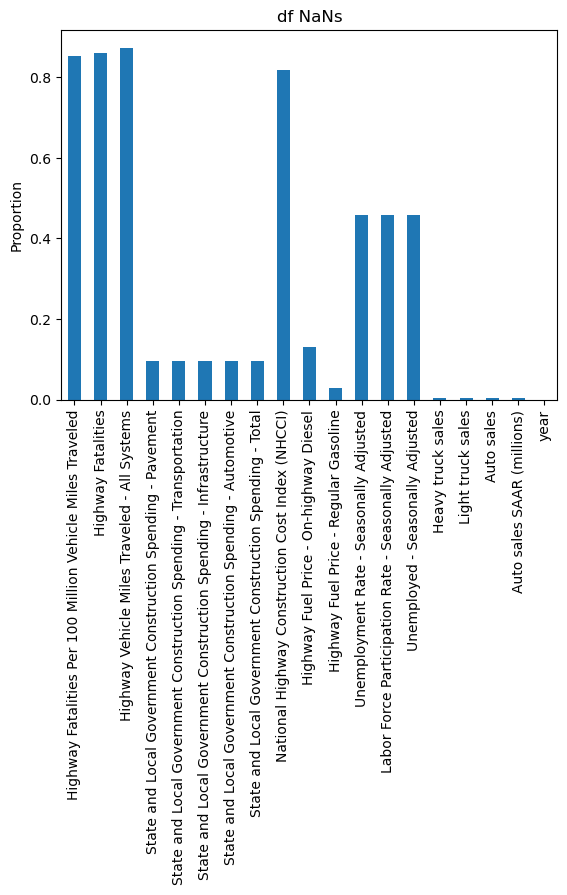

In [125]:
# Extract and create a new column year from the date column
df = pd.read_csv('mts.csv').drop('Index', axis=1)
year = df['Date'].str.extract(r'/(\d+)\s12', expand=False).astype(int)
df['year'] = year

# Filter for years desired
### CHANGE FOR MORE YEARS? len(df) in range [2000, 2022] contains only 275 entries ###
df = df[(df['year']<=2022) & (df['year']>=1990)]

# Filter for columns wated
### CHANGE FOR MORE COLUMNS? ###
df_column_filter = df.columns[[2, 3, 12, 34, 45, 61, 76, 82, 83, 84, 85, 95, 96, 97, 117, 119, 120, 129, 135]]
df = df[df_column_filter]

# Compute proportion of NaNs in each column
df_nan_proportion = abs(df.describe().iloc[0:1].sub(len(df))).div(len(df))
df_nan_proportion = df_nan_proportion.rename({'count':'NaN Proportion'})

# Visualize
print(df_nan_proportion.squeeze()) # squeeze condenses a DataFrame to a Series
plt.title('df NaNs')
df_nan_proportion.squeeze().plot.bar()
plt.ylabel('Proportion')
plt.show()

The following colums have more than $50\%$ `NaN` values:
* Highway Fatalities Per 100 Million Vehicle Miles Traveled
* Highway Fatalities
* Highway Vehicle Miles Traveled - All Systems
* National Highway Construction Cost Index (NHCCI)

Maybe also drop these columns?

In [122]:
# Explore the types for all columns filtered so far
df.dtypes

Highway Fatalities Per 100 Million Vehicle Miles Traveled            float64
Highway Fatalities                                                   float64
Highway Vehicle Miles Traveled - All Systems                         float64
State and Local Government Construction Spending - Pavement          float64
State and Local Government Construction Spending - Transportation    float64
State and Local Government Construction Spending - Infrastructure    float64
State and Local Government Construction Spending - Automotive        float64
State and Local Government Construction Spending - Total             float64
National Highway Construction Cost Index (NHCCI)                     float64
Highway Fuel Price - On-highway Diesel                               float64
Highway Fuel Price - Regular Gasoline                                float64
Unemployment Rate - Seasonally Adjusted                              float64
Labor Force Participation Rate - Seasonally Adjusted                 float64

In [137]:
# Print out new column numbers for faster nav
for i, column in enumerate(df.columns):
    print(str(i) + " : " + column)

0 : Highway Fatalities Per 100 Million Vehicle Miles Traveled
1 : Highway Fatalities
2 : Highway Vehicle Miles Traveled - All Systems
3 : State and Local Government Construction Spending - Pavement
4 : State and Local Government Construction Spending - Transportation
5 : State and Local Government Construction Spending - Infrastructure
6 : State and Local Government Construction Spending - Automotive
7 : State and Local Government Construction Spending - Total
8 : National Highway Construction Cost Index (NHCCI)
9 : Highway Fuel Price - On-highway Diesel
10 : Highway Fuel Price - Regular Gasoline
11 : Unemployment Rate - Seasonally Adjusted
12 : Labor Force Participation Rate - Seasonally Adjusted
13 : Unemployed - Seasonally Adjusted
14 : Heavy truck sales
15 : Light truck sales
16 : Auto sales
17 : Auto sales SAAR (millions)
18 : year


Only numerical data.

In [164]:
# Graphing helper method
# df: DataFrame
# columns: list containing the GROUP of State and Local Government Construction Spending
# ie. State and Local Government Construction Spending - Pavement, GROUP = "Pavement"
# Plots line plot
def plot_line_year_agg(df, columns):
    # aggregate by year to determine total spending on State and Local Government Construction Spending
    df_grouped_year = df.groupby('year').sum()
    
    # Loop to plot
    title_string = ""
    for column in columns:
        column_string = 'State and Local Government Construction Spending - ' + column
        plt.plot(df_grouped_year.index, df_grouped_year[column_string], label=column)
        title_string + title_string + column + ', '
        
    # legends & labels
    plt.legend()
    plt.title('Construction Spending over the Years: {}'.format(title_string[:-2])) # slicing to get rid of last comma
    plt.ylabel('Spending')
    plt.xlabel('Year')
    plt.show()

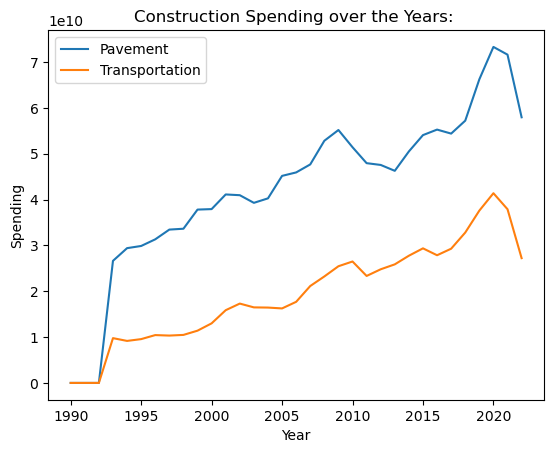

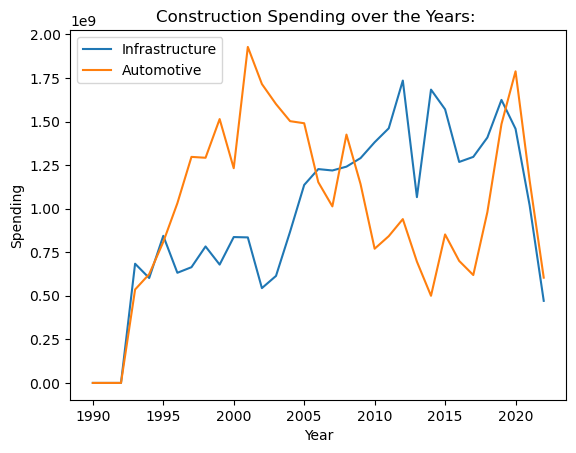

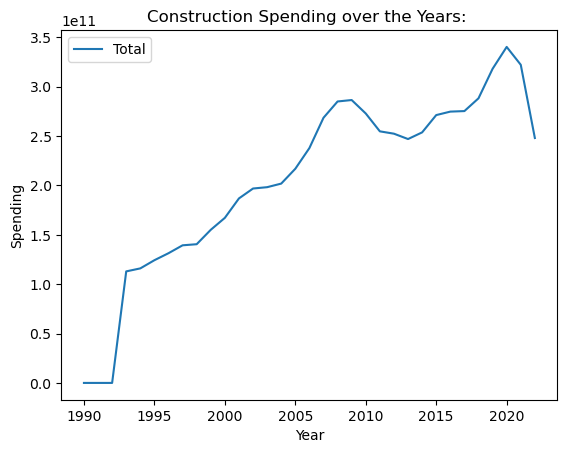

In [165]:
plot_line_year_agg(df, ['Pavement', 'Transportation'])
plot_line_year_agg(df, ['Infrastructure', 'Automotive'])
plot_line_year_agg(df, ['Total'])

In [ ]:
### DEPRECATED CUZ DECIDED TO PUT INTO HELPER ###        
# df_grouped_year = df.groupby('year').sum()

# plot lineplots
# from trial and error, plot pavement and transportation together, infra and auto together, total separate

# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Pavement'], label='Pavement')
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Transportation'], label='Transportation')
# plt.legend()
# plt.title('Construction Spending over the Years: Pavement & Transportation')
# plt.ylabel('Spending')
# plt.xlabel('Year')
# plt.show()

# plt.figure()
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Infrastructure'], label='Infrastructure', color='green')
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Automotive'], label='Automotive', color='red')
# plt.legend()
# plt.title('Construction Spending over the Years: Infra & Auto')
# plt.ylabel('Spending')
# plt.xlabel('Year')
# plt.show()

# plt.figure()
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Total'], label='Total', color='purple')
# plt.legend()
# plt.title('Construction Spending over the Years: Total')
# plt.ylabel('Spending')
# plt.xlabel('Year')
# plt.show()
### DEPRECATED CUZ DECIDED TO PUT INTO HELPER ###